# WSD Based on Wiktionary Data and Contextual Embeddings - Evaluation
Author: Matilda Schauf


## Import Modules

In [1]:
from calc_embeds import *
from wsd_eval import *
import pandas as pd
import json

## Load Best Senses Dicts
key = sentence number (`int`); 

value = `dict` with [key = word (`str`); value = best word sense for the word (`int`)]

In [2]:
# type 1: WSD results with WS method
bestwsdict_path = "../data/best_senses_dict.json"
with open(bestwsdict_path) as d:
    best_senses_dict = json.load(d)

# type 2: WSD results with DEF method
bestdefsendict_path = "../data/best_defsen_dict.json"
with open(bestdefsendict_path) as d2:
    best_defsen_dict = json.load(d2)

# type 3: WSD results with EX method
bestexsendict_path = "../data/best_exsen_dict.json"
with open(bestexsendict_path) as d3:
    best_exsen_dict = json.load(d3)

In [3]:
tsv_path = "../data/2_JuergBirnstiel_Kolosser_4_5_6_20010819.tsv"

In [4]:
df = make_eval_dataframe(tsv_path)

c:\Users\matif\anaconda3\envs\BA_thesis\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
c:\Users\matif\BA\wsd_task\wsd_eval.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.tok[~df.pos.str.contains(r"((NOUN)|(PROPN))")] = df.tok.str.lower()[~df.pos.str.contains(r"((NOUN)|(PROPN))")]
c:\Users\matif\BA\wsd_task\wsd_eval.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tok[~df.pos.str.contains(r"((NOUN)|(PROPN))")] = df.tok.str.lower()[~df.pos.str.contains(r"((NOUN)|(PROPN))")]
c:\Users\matif\BA\wsd_task\wsd_eval.py:33: UserWar

In [5]:
df

,sent_id,tok_id,tok,lemma,pos,ws_num,add_ws,met,vptk_lemma,comment
1,1,2,recht,recht,ADV,2,*,false,*,*
2,1,3,freundlich,freundlich,ADV,1,*,false,*,*
13,2,10,Gliederung,Gliederung,NOUN,1,*,false,*,*
20,4,1,Anwendung,Anwendung,NOUN,2,*,false,*,*
24,5,2,verständlich,verständlich,ADV,1,*,false,*,*
...,...,...,...,...,...,...,...,...,...,...
1675,111,13,sehen,sehen,VERB,2,*,true,*,*
1681,111,19,Leben,Leben,NOUN,2,*,false,*,*
1684,111,22,Verbindung,Verbindung,NOUN,3,*,false,*,*
1686,111,24,Christus,Christus,PROPN,2,*,false,*,*


## Results

Make gold standard dict and calculate accuracies.

In [6]:
gold_standard_dict, more_senses = make_gold_standard_dicts(df)

c:\Users\matif\BA\wsd_task\wsd_eval.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")]


In [7]:
# WORD SENSE vectors
same_ws, diff_ws, good_ws, total = evaluate(gold_standard_dict, more_senses, best_senses_dict)
# DEFINITION vectors
same_ws_def, diff_ws_def, good_ws_def, total_def = evaluate(gold_standard_dict, more_senses, best_defsen_dict)
# EXAMPLE vectors
same_ws_ex, diff_ws_ex, good_ws_ex, total_ex = evaluate(gold_standard_dict, more_senses, best_exsen_dict)
# MFS BASELINE
same_ws_mfs, diff_ws_mfs, good_ws_mfs, total_mfs = mfs_evaluate(gold_standard_dict, more_senses)

In [8]:
columns = ["type", "same", "diff", "good", "total", "accuracy", "accuracy (+good)"]
results = [["WS", same_ws, diff_ws, good_ws, total, same_ws/total, (same_ws+good_ws)/total],
           ["DEF", same_ws_def, diff_ws_def, good_ws_def, total_def, same_ws_def/total_def, (same_ws_def+good_ws_def)/total_def],
           ["EX", same_ws_ex, diff_ws_ex, good_ws_ex, total_ex, same_ws_ex/total_ex, (same_ws_ex+good_ws_ex)/total_ex],
           ["MFS", same_ws_mfs, diff_ws_mfs, good_ws_mfs, total_mfs, same_ws_mfs/total_mfs, (same_ws_mfs+good_ws_mfs)/total_mfs]]
index = ["WS", "DEF", "EX", "MFS"]
result_df = pd.DataFrame(results, columns=columns, index=index)

In [9]:
result_df

,type,same,diff,good,total,accuracy,accuracy (+good)
WS,WS,167,201,7,375,0.445333,0.464000
DEF,DEF,115,256,4,375,0.306667,0.317333
EX,EX,183,184,8,375,0.488000,0.509333
MFS,MFS,243,145,9,397,0.612091,0.634761


<AxesSubplot:>

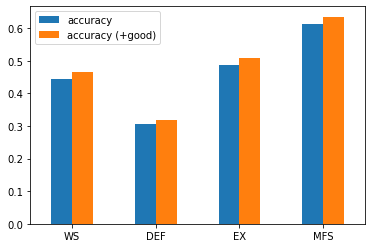

In [10]:
result_df[["accuracy", "accuracy (+good)"]].plot.bar(rot=0)

## Modify Data Frame
Add columns with the results of the WS, DEF, and EX method.

In [11]:
df = make_ws_column(best_senses_dict, df, "ws_res")
df = make_ws_column(best_defsen_dict, df, "def_res")
df = make_ws_column(best_exsen_dict, df, "ex_res")

In [12]:
# new df with additional columns
df.head()

,sent_id,tok_id,tok,lemma,pos,ws_num,add_ws,met,vptk_lemma,comment,ws_res,def_res,ex_res
1,1,2,recht,recht,ADV,2,*,false,*,*,3,3,2
2,1,3,freundlich,freundlich,ADV,1,*,false,*,*,1,2,1
13,2,10,Gliederung,Gliederung,NOUN,1,*,false,*,*,1,1,1
20,4,1,Anwendung,Anwendung,NOUN,2,*,false,*,*,1,3,1
24,5,2,verständlich,verständlich,ADV,1,*,false,*,*,1,2,2


## Further Analysis

### No Content Words
Number of words that are not tagged as (proper) nouns, adjectives, adverbs, or verbs.

In [13]:
print(len(df[~df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")]))

98


C:\Users\matif\AppData\Local\Temp\ipykernel_16956\3625298245.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(len(df[~df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")]))


Show non-content words. Cell 1: First half. Cell 2: Second half.

In [14]:
#df[~df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")].head(49)

In [15]:
#df[~df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")].tail(49)

### Verb Particles
Show verbs with separated particles.

In [16]:
df[df.vptk_lemma!="*"]

,sent_id,tok_id,tok,lemma,pos,ws_num,add_ws,met,vptk_lemma,comment,ws_res,def_res,ex_res
1199,84,32,reissen,reissen,VERB,2,*,false,niederreißen,*,*,*,*
1223,85,2,nehmen,nehmen,VERB,1,*,false,gefangen nehmen,*,2,2,4
1321,88,8,hält,halten,VERB,2,*,false,vorhalten,*,9,5,9
1612,107,17,weicht,weichen,VERB,1,*,false,zurückweichen,*,2,2,2


### Gold Standard Dataframe
Make new data frama leaving out unwanted words:
- non-content words
- words with separated particles
- duplicate words in a sentence

In [17]:
gs_df = make_gs_df(df)

c:\Users\matif\BA\wsd_task\wsd_eval.py:187: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  gs_df = gs_df[gs_df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")]


In [18]:
gs_df

,sent_id,tok_id,tok,lemma,pos,ws_num,add_ws,met,vptk_lemma,comment,ws_res,def_res,ex_res
1,1,2,recht,recht,ADV,2,*,false,*,*,3,3,2
2,1,3,freundlich,freundlich,ADV,1,*,false,*,*,1,2,1
13,2,10,Gliederung,Gliederung,NOUN,1,*,false,*,*,1,1,1
20,4,1,Anwendung,Anwendung,NOUN,2,*,false,*,*,1,3,1
24,5,2,verständlich,verständlich,ADV,1,*,false,*,*,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,111,13,sehen,sehen,VERB,2,*,true,*,*,1,1,1
1681,111,19,Leben,Leben,NOUN,2,*,false,*,*,2,4,2
1684,111,22,Verbindung,Verbindung,NOUN,3,*,false,*,*,4,4,6
1686,111,24,Christus,Christus,PROPN,2,*,false,*,*,2,2,1


### Words Not Recognized by Algorithm
Words that only exist in the gold standard data and were not recognized by the algorithm.

In [19]:
only_gs = gs_df[gs_df.ws_res=="*"]
print(len(only_gs))

22


In [20]:
only_gs

,sent_id,tok_id,tok,lemma,pos,ws_num,add_ws,met,vptk_lemma,comment,ws_res,def_res,ex_res
50,7,2,weiss,weiss,VERB,1,*,false,*,*,*,*,*
97,9,17,so,so,ADV,2,*,false,*,*,*,*,*
105,10,6,grosse,groses,ADJ,1,"1,4",false,*,*,*,*,*
111,10,12,Glauben,Glauben,NOUN,1,*,false,*,*,*,*,*
310,21,1,bemüht,bemühen,VERB,1,*,false,*,*,*,*,*
352,25,3,freundlich,freundlich,ADV,1,*,false,*,*,*,*,*
364,26,5,so,so,ADV,2,*,false,*,*,*,*,*
419,30,14,gross,gross,ADV,1,*,false,*,*,*,*,*
462,34,14,denkt,denken,VERB,1,*,false,*,*,*,*,*
618,43,4,bedacht,bedacht,ADV,1,*,false,*,*,*,*,*


### Metaphors
Words in the gold standard data tagged as metaphors by the annotator.

In [21]:
df_met = gs_df[gs_df.met=="true"]
print("Metaphors:", len(df_met))
print("Words in GS data:", len(gs_df))
print("Metaphor ratio:", len(df_met)/len(gs_df))

Metaphors: 25
Words in GS data: 397
Metaphor ratio: 0.06297229219143577


Performance of MFS baseline for metaphors.

In [22]:
mfs_same = len(df_met[df_met.ws_num==1])/len(df_met)
mfs_same_good = (len(df_met[df_met.ws_num==1])+1)/len(df_met)
print("MFS accuracy:", mfs_same)
print("MFS accuracy (+good):", mfs_same_good)

MFS accuracy: 0.36
MFS accuracy (+good): 0.4


Remove words not recognized by the WSD algorithm from the metaphor data frame.

In [23]:
df_met = df_met[df_met.ws_res!="*"]
metaphors = len(df_met)
print("Metaphors recognized by algorithm:", metaphors)

Metaphors recognized by algorithm: 24


Compute performance of the WS, DEF, and EX methods on metaphors.

In [24]:
ws_same = len(df_met[df_met.ws_res==df_met.ws_num])/metaphors
ws_same_good = (len(df_met[df_met.ws_res==df_met.ws_num])+1)/metaphors
def_same = len(df_met[df_met.def_res==df_met.ws_num])/metaphors
ex_same = len(df_met[df_met.ex_res==df_met.ws_num])/metaphors
ex_same_good = (len(df_met[df_met.ex_res==df_met.ws_num])+1)/metaphors

print("WS accuracy:", ws_same)
print("WS accuracy (+good):", ws_same_good)
print("DEF accuracy:", def_same)
print("EX accuracy:", ex_same)
print("EX accuracy (+good):", ex_same_good)

WS accuracy: 0.16666666666666666
WS accuracy (+good): 0.20833333333333334
DEF accuracy: 0.125
EX accuracy: 0.375
EX accuracy (+good): 0.4166666666666667


### Accuracy of Words with Word Sense != 1

Statistics about the ratios of the different word senses.

In [25]:
ws_nums = set(gs_df.ws_num)
print(ws_nums)
max_ws = max(ws_nums)
print(max_ws)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12}
12


In [26]:
wsn_ratios = list()
for ws_num in ws_nums:
    words = len(gs_df[gs_df.ws_num==ws_num])
    wsn_ratios.append([ws_num, words, round(words/len(gs_df), 6)])

In [27]:
wsn_ratios

[[0, 2, 0.005038],
 [1, 243, 0.612091],
 [2, 105, 0.264484],
 [3, 26, 0.065491],
 [4, 10, 0.025189],
 [5, 3, 0.007557],
 [6, 4, 0.010076],
 [7, 1, 0.002519],
 [8, 1, 0.002519],
 [10, 1, 0.002519],
 [12, 1, 0.002519]]

In [28]:
# for making pie chart
words = 0
ratio = 0
for element in wsn_ratios:
    if element[0] > 4:
        words += element[1]
        ratio += element[2]
new_list = ["5+", words, ratio]
wsn_ratios_new = wsn_ratios[:5]
wsn_ratios_new.append(new_list)
wsn_ratios_new

[[0, 2, 0.005038],
 [1, 243, 0.612091],
 [2, 105, 0.264484],
 [3, 26, 0.065491],
 [4, 10, 0.025189],
 ['5+', 11, 0.027709]]

<AxesSubplot:ylabel='ratio'>

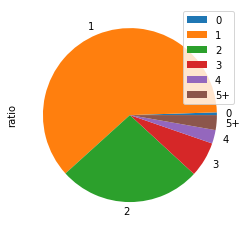

In [29]:
wsn_df = pd.DataFrame(wsn_ratios_new, columns=["ws_no", "words_total", "ratio"], index=[0, 1, 2, 3, 4, "5+"])
wsn_df.plot.pie(y="ratio")

Analysis of the performance of the three embedding methods (WS, DEF and EX) and the MFS baseline for words with word sense != 1.

In [30]:
highws_df = gs_df[gs_df.ws_num!=1]

In [31]:
hws_gsdict, hws_mores = make_gold_standard_dicts(highws_df)

same, diff, good, total = evaluate(hws_gsdict, hws_mores, best_senses_dict)
same_def, diff_def, good_def, total_def = evaluate(hws_gsdict, hws_mores, best_defsen_dict)
same_ex, diff_ex, good_ex, total_ex = evaluate(hws_gsdict, hws_mores, best_exsen_dict)
same_mfs, diff_mfs, good_mfs, total_mfs = mfs_evaluate(hws_gsdict, hws_mores)

c:\Users\matif\BA\wsd_task\wsd_eval.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df.pos.str.contains("(NOUN|PROPN|ADJ|ADV|VERB)")]


In [32]:
columns = ["type", "same", "diff", "good", "total", "accuracy", "accuracy (+good)"]
h_res = [["WS", same, diff, good, total, same/total, (same+good)/total],
        ["DEF", same_def, diff_def, good_def, total_def, same_def/total_def, (same_def+good_def)/total_def],
        ["EX", same_ex, diff_ex, good_ex, total_ex , same_ex/total_ex, (same_ex+good_ex)/total_ex]]
index = ["WS", "DEF", "EX"]
hres_df = pd.DataFrame(h_res, columns=columns, index=index)

In [33]:
hres_df

,type,same,diff,good,total,accuracy,accuracy (+good)
WS,WS,50,93,6,149,0.335570,0.375839
DEF,DEF,27,121,1,149,0.181208,0.187919
EX,EX,65,78,6,149,0.436242,0.476510


<AxesSubplot:>

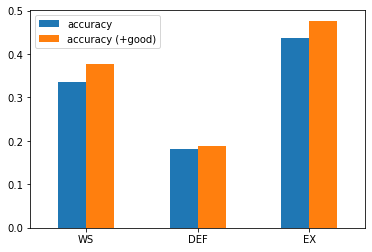

In [34]:
hres_df[["accuracy", "accuracy (+good)"]].plot.bar(rot=0)

## Evaluation Text Information

No. of tokens & No. of token types

In [35]:
text_path = "../data/2_JuergBirnstiel_Kolosser_4_5_6_20010819.txt"
tokens = 0
tok_set = set()
with open(text_path) as file:
    for line in file:
        for token in line.split():
            tokens += 1
            tok_set.add(token)
print("Tokens", tokens)
print("Types", len(tok_set))

Tokens 1683
Types 656
